## 2. Задание 2:

### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом h.

Построение вариационного ряд:

In [101]:
x<-c(2.877,3.162,3.071,2.939,3.055,2.928,3.053,2.979,2.845,3.042,3.043,3.109,3.102,3.001,3.021,2.894,3.103,2.971,3.069,2.977,3.038,
2.998,2.896,3.065,2.829,3.025,2.879,3.036,3.001,2.979,3.007,2.754,3.061,3.015,2.892,3.068,2.998,3.128,3.035,3.159,3.091,3.156,
3.004,2.813,2.983,2.951,2.944,3.127,3.041,3.278)

VariationalSeries<-sort(x)
cat("Вариационный ряд: ",VariationalSeries)

Вариационный ряд:  2.754 2.813 2.829 2.845 2.877 2.879 2.892 2.894 2.896 2.928 2.939 2.944 2.951 2.971 2.977 2.979 2.979 2.983 2.998 2.998 3.001 3.001 3.004 3.007 3.015 3.021 3.025 3.035 3.036 3.038 3.041 3.042 3.043 3.053 3.055 3.061 3.065 3.068 3.069 3.071 3.091 3.102 3.103 3.109 3.127 3.128 3.156 3.159 3.162 3.278

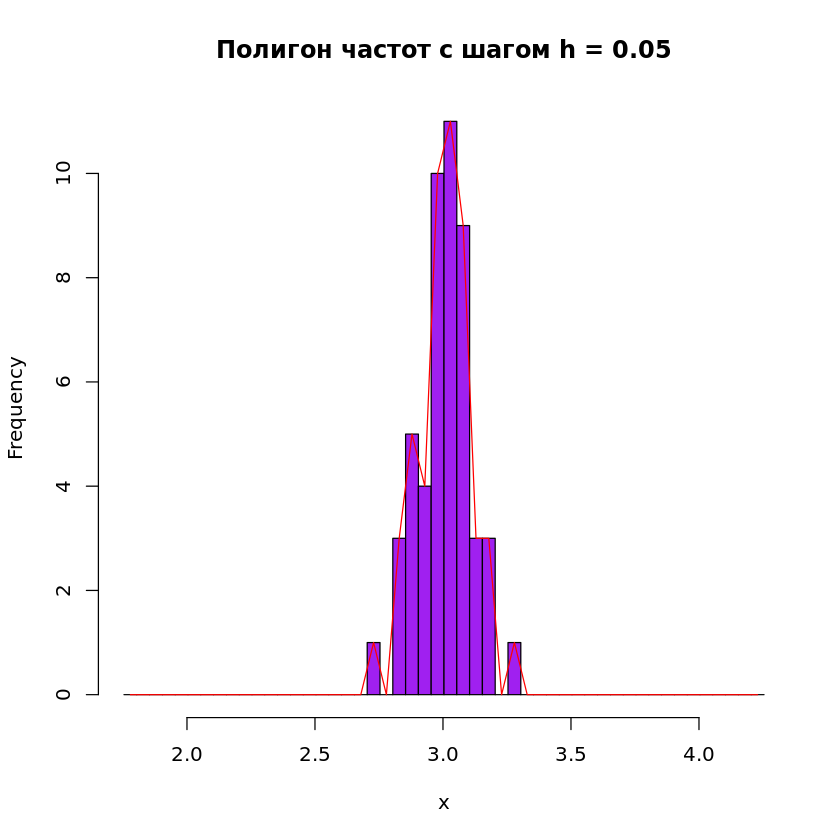

In [102]:
F<- function(x,t){z<-x[x<t]; length(z)/length(x)}
plot(ecdf(x))
h <- hist(x, col="purple")
h2 <- hist(x,breaks=seq(min(x)-1, max(x)+1, by=0.05) ,col="purple", main = "Полигон частот с шагом h = 0.05")
lines(h2$counts~h2$mids, col="red")

### **b)** Вычислить выборочные аналоги следующих числовых характеристик:(i) математического ожидания, (ii) дисперсии, (iii) медианы, (iv) асимметрии, (v) эксцесса, (vi) вероятности P(X $\in$ [a, b]).

**(i) Нахождение математического ожидания:**

In [103]:
E<-sum(x)/length(x)
cat("E(x) = ",E)

E(x) =  3.00984

**(ii) Нахождение дисперсии**

In [104]:
D<-sum(x^2)/length(x)-E^2
cat("D(x) = ",D)

D(x) =  0.009800854

**(iii) Нахождение медианы:**

In [105]:

cat("M_e = ", median(x))

M_e =  3.018

**(iv) Нахождение асимметрии:**

In [106]:
A_s<-sum((x-E)^3)/(length(x)*D^(3/2));
cat("A_s = ", A_s,"\n")

A_s =  -0.1795672 


**(v) Нахождение эксцесса:**

In [107]:
E_k<-(sum((x-E)^4)/(length(x)*D^2))-3;
cat("E_k = ", E_k)

E_k =  0.3814977

**(vi) Нахождение вероятности $P(X∈[c,d])$:**

In [108]:
c <- 2.29
d <- 3.06
p <- F(x,d) - F(x,c)
cat("P(X∈[c,d]) = ", p)

P(X∈[c,d]) =  0.7

### d) Построить асимптотический доверительный интервал уровня значимости α2 для параметра λ на базе оценки максимального правдоподобия.

Так как $x_i$ имеет распределение Пуассона, то $I_1(\lambda)=\frac 1\lambda$. Из этого следует, что $I(𝜆)=𝑛∗𝐼_1(𝜆)=\frac n\lambda $.

По методу максимального правдоподобия:

$\Large \bar \lambda = \frac{1}{\bar {\bar x}} $

$\Large \sqrt{I(\lambda)}(\bar \lambda - \lambda) => N(0,1)$

Эксперимент регулярен, значит, подстановка ОМП вместо параметра в информацию Фишера не нарушает асимптотической нормальности.

$\Large \sqrt{n*I_1(\lambda)}(\bar  \lambda - \lambda) => N(0,1)$

$\Large \sqrt{\frac{n}{\lambda ^2}}(\frac {1 }{\bar x} - \lambda) => N(0,1), \alpha_2 = 0.1$

$\Large p(T_1(\bar x) \leqslant \lambda \leqslant T_2(\bar x)) = 1 - \alpha_2$

$\Large 𝑝(−𝑥_𝛼≤\sqrt{n \bar x^2}(\frac{1}{𝑥̅}−𝜆)≤x_𝛼)=Ф(𝑥_𝛼)−Ф(−𝑥_𝛼)=2∗Ф(𝑥_𝛼)−1=1−𝛼_2$

где $\Large Ф(𝑥_𝛼)=\frac 1{\sqrt {2\pi}}∫_{- \infty}^{x_\alpha}𝑒^{-\frac{t^2}{2}}dt$ - квантиль порядка $x_α$ стандартного нормального закона распределения.

$\large x_\alpha = Ф^{-1}(1-\frac{\alpha_1}{2})$

$\large p(\frac{1}{\bar x} - x_\alpha\sqrt{\frac{1}{n\bar{\bar x^2}}}\leqslant \lambda \leqslant \frac{1}{\bar x} + x_\alpha\sqrt{\frac{1}{n\bar{\bar x^2}}}) = 1-\alpha_2$

In [109]:
a_2 <- 0.1 #вероятность того что не попадет в интервал 
x_a <- qnorm(1-a_2/2)

T[1]<-1/E-x_a/sqrt(E*E*length(x)) 

T[2]<-1/E+x_a/sqrt(E*E*length(x)) 
cat("Левая граница = ", T[1],"\n")
cat("Правая граница = ", T[2])

Левая граница =  0.2549579 
Правая граница =  0.4095292

### f) Используя гистограмму частот, построить критерий значимости χ2 проверки простой гипотезы согласия с показательным распределением с параметром λ0. Проверить гипотезу на уровне α2. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [110]:
table(x)

x
2.754 2.813 2.829 2.845 2.877 2.879 2.892 2.894 2.896 2.928 2.939 2.944 2.951 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
2.971 2.977 2.979 2.983 2.998 3.001 3.004 3.007 3.015 3.021 3.025 3.035 3.036 
    1     1     2     1     2     2     1     1     1     1     1     1     1 
3.038 3.041 3.042 3.043 3.053 3.055 3.061 3.065 3.068 3.069 3.071 3.091 3.102 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
3.103 3.109 3.127 3.128 3.156 3.159 3.162 3.278 
    1     1     1     1     1     1     1     1 

In [111]:
alpha.0 <- 3.00
sigma.0 <- 0.1
nu <- h$counts
brk <- 1:length(h$breaks)-1

lw <- c(-Inf, brk)
up <- c(brk, Inf)
p.0 <-pnorm(up, alpha.0, sigma.0) - pnorm(lw, alpha.0, sigma.0)


X <- sum((nu - length(x)*p.0)^2/(length(x)*p.0))

x.alpha <- qchisq(0.98, length(h$breaks)-1)

cat("\nВыборка  = ",X)
cat("\nнаибольшмй уровень значимости = ",1 - pchisq(X, length(h$breaks)-1))


Выборка  =  Inf
наибольшмй уровень значимости =  0

Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”


### g) Построить критерий проверки значимости χ2 сложной гипотезы согласия с показательным распределением. Проверить гипотезу на уровне α2. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [112]:
f <-  function(alpha, sigma){
  p.0 <-pnorm(up, alpha, sigma) - pnorm(lw, alpha, sigma)
  X <- sum((nu - length(x)*p.0)^2/(length(x)*p.0)) 
  return(X)
}
nlm.res <- nlm(f, mean(x), var(x))
x.alpha <- qchisq(0.98, length(h$breaks)-2)

cat("x.alpha - ", x.alpha)
X.bar <- nlm.res$minimum
cat("\nX.bar - ", X.bar)

x.alpha -  13.38822
X.bar -  1.797693e+308

Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”
Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”
Warning message in nlm(f, mean(x), var(x)):
“NA/Inf replaced by maximum positive value”
Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”
Warning message in nlm(f, mean(x), var(x)):
“NA/Inf replaced by maximum positive value”


### i) В пунктах (c)-(h) заменить семейство показательных распределений на семейство гамма-распределений.

In [116]:

nu <- h$counts
brk <- 1:length(h$breaks)
lw <- c(-Inf, brk)
up <- c(brk, Inf)
p.0 <-pnorm(up, alpha.0, sigma.0) - pnorm(lw, alpha.0, sigma.0)
X <- sum((nu - length(x)*p.0)^2/(length(x)*p.0))

x.alpha <- qchisq(0.98, length(h$breaks)-1)
cat("\nВыборка  = ",X)
cat("\nнаибольшмй уровень значимости = ",1 - pchisq(X, length(h$breaks)-1))


Выборка  =  Inf
наибольшмй уровень значимости =  0

Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”


In [118]:
f <-  function(alpha, sigma){
  p.0 <-pnorm(up, alpha, sigma) - pnorm(lw, alpha, sigma)
  X <- sum((nu - length(x)*p.0)^2/(length(x)*p.0)) 
  return(X)
}
nlm.res <- nlm(f, mean(x), sd(x))
x.alpha <- qchisq(0.98, 7)

cat("x.alpha - ", x.alpha)
X.bar <- nlm.res$minimum
cat("\nX.bar - ", X.bar)

x.alpha -  16.62242
X.bar -  1.797693e+308

Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”
Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”
Warning message in nlm(f, mean(x), sd(x)):
“NA/Inf replaced by maximum positive value”
Warning message in nu - length(x) * p.0:
“longer object length is not a multiple of shorter object length”
Warning message in nlm(f, mean(x), sd(x)):
“NA/Inf replaced by maximum positive value”
